In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib

import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import galpy
from galpy.orbit import Orbit
import math

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [2]:
data = Table.read('/Users/ioanaciuca/Desktop/BINGO_P3/data/SD_pred_highquality.fits')

In [3]:
mask = ((data['M_H_1'] > -1.0) & (data['R_2'] >=7.0) & (data['R_2'] <= 9.0) & (abs(data['z_2c']) <= 2.0))
data_cut = data[mask]

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)



# Picking the triangle

In [4]:
mh = data_cut['M_H_1']
alpha = data_cut['ALPHA_M_1']
logAge = data_cut['pred_logAge']
vz = data_cut['vz_2']
vphi = data_cut['vphi_2']
Jz = data_cut['Jz_2']
Rc = data_cut['Rc_2']
JR = data_cut['JR_2']
R = data_cut['R_2']

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/matplotlib/patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"



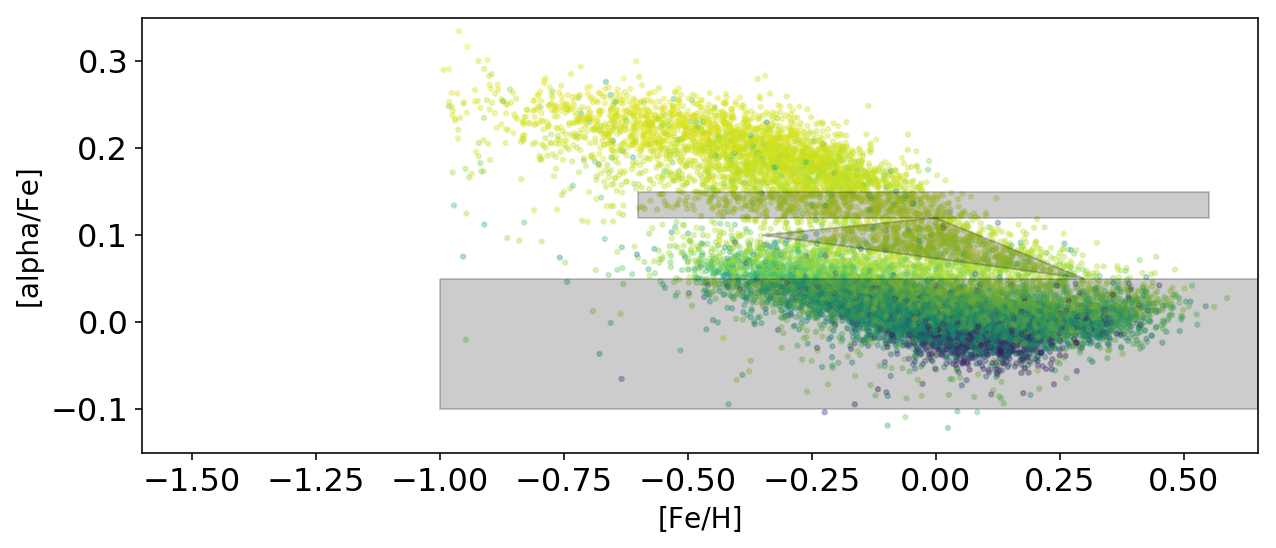

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

im = ax.scatter(mh, alpha, s=5, alpha=0.3, c=logAge)

ax.set_xlabel('[Fe/H]', fontsize=14)
ax.set_ylabel('[alpha/Fe]', fontsize=14)

# hal hfe selection
polygon = Polygon([(-0.35, 0.1), (0.3, 0.05), (0.0, 0.12)])
patch = PolygonPatch(polygon, facecolor=[0,0,0.5], color='k', edgecolor=[1,1,1], alpha=0.2) 

# low alpha selection
polygon_lowal = Polygon([(-1.0, 0.05), (-1.0, -0.1), (0.65, -0.1), (0.65, 0.05)])
patch_lowal= PolygonPatch(polygon_lowal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

polygon_highal = Polygon([(-0.6, 0.12), (-0.6, 0.15), (0.55, 0.15), (0.55, 0.12)])
patch_highal = PolygonPatch(polygon_highal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

ax.set_ylim(-0.15, 0.35)
ax.set_xlim(-1.6, 0.65)

ax.add_patch(patch)
ax.add_patch(patch_lowal)
ax.add_patch(patch_highal)

#plt.savefig('./regions.png')

In [6]:
mask_halhfe = []
mask_lowalpha = []
mask_highalpha = []
for i in range(len(mh)):
    p1 = Point(mh[i], alpha[i])
    
    mask_halhfe.append(polygon.contains(p1))
    mask_lowalpha.append(polygon_lowal.contains(p1))
    mask_highalpha.append(polygon_highal.contains(p1))


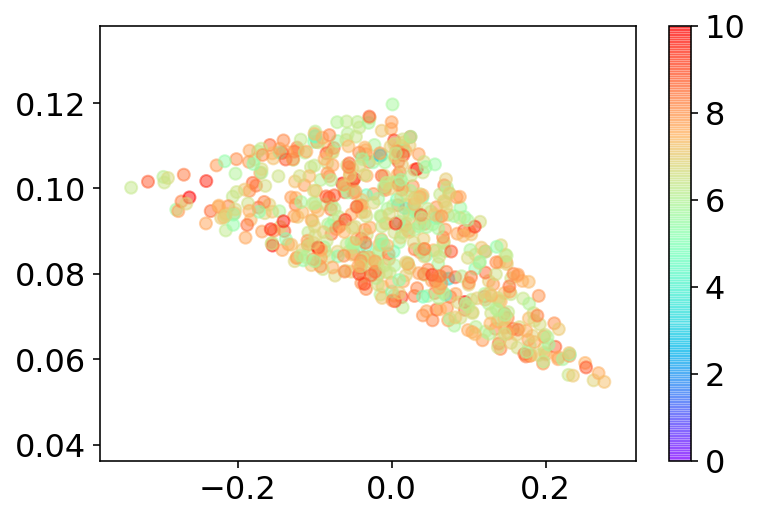

In [7]:
hal_hfe = data_cut[mask_halhfe]
norm_age = mpl.colors.Normalize(vmin=0.0, vmax=10)

plt.scatter(hal_hfe['M_H_1'],hal_hfe['ALPHA_M_1'], alpha=0.5, c=hal_hfe['Rc_2'], norm=norm_age, cmap='rainbow')
plt.colorbar()

In [ ]:
lowal = data_cut[mask_lowalpha]

norm_age = mpl.colors.Normalize(vmin=10.0, vmax=14)

plt.scatter(lowal['M_H_1'], lowal['ALPHA_M_1'], alpha=0.5, c=10**lowal['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

In [ ]:
highal = data_cut[mask_highalpha]

norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(highal['M_H_1'], highal['ALPHA_M_1'], alpha=0.5, c=10**highal['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

In [ ]:
fig, ax = plt.subplots()
import seaborn as sns

ax = sns.kdeplot(hal_hfe['Jz_2'], label='hal-hfe')
ax = sns.kdeplot(highal['Jz_2'], label='highal')
#ax = sns.kdeplot(lowal['Jz_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$J_z$', fontsize=22)

ax.set_xlim(0, 300)

fig.tight_layout()

plt.savefig('./jz_halhfe_highal_lowal.png')

#plt.savefig('./afe_feh_general.png', format='png', dpi=200)

In [ ]:
fig, ax = plt.subplots()
import seaborn as sns

ax = sns.kdeplot(hal_hfe['Rc_2'], label='hal-hfe')
ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$Rc$', fontsize=22)

ax.set_xlim(0, 10)

fig.tight_layout()

#plt.savefig('./rc_halhfe_highal_lowal.png')

In [ ]:
mask1 = (10**hal_hfe['pred_logAge'] >= 13)
halhfe_13 = hal_hfe[mask1]
len(halhfe_13)

mask2 = ((10**hal_hfe['pred_logAge'] >= 12) & (10**hal_hfe['pred_logAge'] < 13))
halhfe_12_13 = hal_hfe[mask2]
len(halhfe_12_13)

mask3 = ((10**hal_hfe['pred_logAge'] >= 11) & (10**hal_hfe['pred_logAge'] < 12))
halhfe_11_12 = hal_hfe[mask3]
len(halhfe_11_12)

mask4 = (10**hal_hfe['pred_logAge'] < 11)
halhfe_10_11 = hal_hfe[mask4]
len(halhfe_10_11)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
import seaborn as sns

ax = sns.kdeplot(halhfe_13['Rc_2'], label='age > 13')
ax = sns.kdeplot(halhfe_12_13['Rc_2'], label='12 < age < 13')
ax = sns.kdeplot(halhfe_11_12['Rc_2'], label='11 < age < 12')
ax = sns.kdeplot(halhfe_10_11['Rc_2'], label='age < 11')

#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$Rc$', fontsize=22)

ax.set_xlim(0, 10)

fig.tight_layout()

#fig.savefig('./rc_dist.png')

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
import seaborn as sns

ax4.scatter(halhfe_13['Rc_2'], halhfe_13['M_H_1'], color='b', alpha=0.7, label='halhfe: age > 13')
ax3.scatter(halhfe_12_13['Rc_2'], halhfe_12_13['M_H_1'], color='b', alpha=0.7, label='halhfe: 12 < age < 13')
ax2.scatter(halhfe_11_12['Rc_2'], halhfe_11_12['M_H_1'], color='b', alpha=0.7, label='halhfe: 11 < age < 12')
ax1.scatter(halhfe_10_11['Rc_2'], halhfe_10_11['M_H_1'], color='b', alpha=0.7, label='halhfe: age < 11')
ax5.scatter(highal['Rc_2'],highal['M_H_1'], color='k', alpha=0.7, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax1.set_ylabel(r'$[M/H]$', fontsize=22)
ax1.set_xlabel(r'$Rc$', fontsize=22)
ax2.set_xlabel(r'$Rc$', fontsize=22)
ax3.set_xlabel(r'$Rc$', fontsize=22)
ax4.set_xlabel(r'$Rc$', fontsize=22)
ax5.set_xlabel(r'$Rc$', fontsize=22)

ax1.set_xlim(0, 12)
ax2.set_xlim(0, 12)
ax3.set_xlim(0, 12)
ax4.set_xlim(0, 12)
ax5.set_xlim(0, 12)

ax1.set_ylim(-0.6, 0.55)
ax2.set_ylim(-0.6, 0.55)
ax3.set_ylim(-0.6, 0.55)
ax4.set_ylim(-0.6, 0.55)
ax5.set_ylim(-0.6, 0.55)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

fig.tight_layout()

#fig.savefig('./rc_mh_halhfe_highal.png')

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
import seaborn as sns

ax4.scatter(halhfe_13['Jz_2'], halhfe_13['M_H_1'], color='b', alpha=0.7, label='halhfe: age > 13')
ax3.scatter(halhfe_12_13['Jz_2'], halhfe_12_13['M_H_1'], color='b', alpha=0.7, label='halhfe: 12 < age < 13')
ax2.scatter(halhfe_11_12['Jz_2'], halhfe_11_12['M_H_1'], color='b', alpha=0.7, label='halhfe: 11 < age < 12')
ax1.scatter(halhfe_10_11['Jz_2'], halhfe_10_11['M_H_1'], color='b', alpha=0.7, label='halhfe: age < 11')
ax5.scatter(highal['Jz_2'],highal['M_H_1'], color='k', alpha=0.7, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax1.set_ylabel(r'$[M/H]$', fontsize=22)
ax1.set_xlabel(r'$Jz$', fontsize=22)
ax2.set_xlabel(r'$Jz$', fontsize=22)
ax3.set_xlabel(r'$Jz$', fontsize=22)
ax4.set_xlabel(r'$Jz$', fontsize=22)
ax5.set_xlabel(r'$Jz$', fontsize=22)

xlower = -100
xupper = 300
ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ylower = -1.0
yupper = 0.55
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

fig.tight_layout()

#fig.savefig('./rc_mh_halhfe_highal.png')

In [ ]:
norm_rc = mpl.colors.Normalize(vmin=7.0, vmax=10)

mask1 = (10**data_cut['pred_logAge'] >= 13)
halhfe_13 = data_cut[mask1]

highal = data_cut[data_cut['ALPHA_M_1'] > 0.12]
len(halhfe_13)

mask2 = ((10**data_cut['pred_logAge'] >= 12) & (10**data_cut['pred_logAge'] < 13))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 11) & (10**data_cut['pred_logAge'] < 12))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 10) & (10**data_cut['pred_logAge'] < 11))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 9) & (10**data_cut['pred_logAge'] < 10))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 8) & (10**data_cut['pred_logAge'] < 9))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

im6 = ax6.scatter(halhfe_13['M_H_1'], halhfe_13['ALPHA_M_1'], c=halhfe_13['Rc_2'], norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: age > 13')
im5 = ax5.scatter(halhfe_12_13['M_H_1'],halhfe_12_13['ALPHA_M_1'], c=halhfe_12_13['Rc_2'], norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 12 < age < 13')
im4 = ax4.scatter(halhfe_11_12['M_H_1'], halhfe_11_12['ALPHA_M_1'], c=halhfe_11_12['Rc_2'], norm=norm_rc, cmap=cmap, s=5, alpha=0.5, label='all: 11 < age < 12')
im3 = ax3.scatter(halhfe_10_11['M_H_1'], halhfe_10_11['ALPHA_M_1'], c=halhfe_10_11['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 10< age < 11')
im2 = ax2.scatter(halhfe_9_10['M_H_1'], halhfe_9_10['ALPHA_M_1'], c=halhfe_9_10['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 9< age < 10')
im1 = ax1.scatter(halhfe_8_9['M_H_1'], halhfe_8_9['ALPHA_M_1'], c=halhfe_8_9['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 8 < age < 9')
#ax6.scatter(highal['M_H_1'], highal['ALPHA_M_1'], color='k', alpha=0.5, s=5, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax1.set_ylabel(r'$[\alpha/Fe]$', fontsize=22)
ax1.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax2.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax3.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax4.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax5.set_xlabel(r'$[Fe/H]$', fontsize=22)

xlower = -1.0
xupper = 0.55

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -0.1
yupper = 0.35
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$R_c$')

ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax2.xaxis.set_major_locator(MultipleLocator(0.4))
ax3.xaxis.set_major_locator(MultipleLocator(0.4))
ax4.xaxis.set_major_locator(MultipleLocator(0.4))
ax5.xaxis.set_major_locator(MultipleLocator(0.4))
ax6.xaxis.set_major_locator(MultipleLocator(0.4))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax5.yaxis.set_major_locator(MultipleLocator(0.1))
ax6.yaxis.set_major_locator(MultipleLocator(0.1))


lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()


fig.tight_layout()

#fig.savefig('./interesting_plot.png', dpi=100)

In [ ]:
norm_rc = mpl.colors.Normalize(vmin=7.0, vmax=10.0)

mask1 =((10**data_cut['pred_logAge'] >= 7) & (10**data_cut['pred_logAge'] < 8))
halhfe_13 = data_cut[mask1]

mask2 = ((10**data_cut['pred_logAge'] >= 6) & (10**data_cut['pred_logAge'] < 7))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 5) & (10**data_cut['pred_logAge'] < 6))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 4) & (10**data_cut['pred_logAge'] < 5))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 3) & (10**data_cut['pred_logAge'] < 4))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 2) & (10**data_cut['pred_logAge'] < 3))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

im6 = ax6.scatter(halhfe_13['M_H_1'], halhfe_13['ALPHA_M_1'], c=halhfe_13['Rc_2'], norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 7< age <= 8 ')
im5 = ax5.scatter(halhfe_12_13['M_H_1'],halhfe_12_13['ALPHA_M_1'], c=halhfe_12_13['Rc_2'], norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 6 < age < 7')
im4 = ax4.scatter(halhfe_11_12['M_H_1'], halhfe_11_12['ALPHA_M_1'], c=halhfe_11_12['Rc_2'], norm=norm_rc, cmap=cmap, s=5, alpha=0.5, label='all: 5< age < 6')
im3 = ax3.scatter(halhfe_10_11['M_H_1'], halhfe_10_11['ALPHA_M_1'], c=halhfe_10_11['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 4< age < 5')
im2 = ax2.scatter(halhfe_9_10['M_H_1'], halhfe_9_10['ALPHA_M_1'], c=halhfe_9_10['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 3< age < 4')
im1 = ax1.scatter(halhfe_8_9['M_H_1'], halhfe_8_9['ALPHA_M_1'], c=halhfe_8_9['Rc_2'], norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 2 < age < 3')

ax1.set_ylabel(r'$[\alpha/Fe]$', fontsize=22)
ax1.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax2.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax3.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax4.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax5.set_xlabel(r'$[Fe/H]$', fontsize=22)
xlower = -1.0
xupper = 0.55

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -0.1
yupper = 0.35
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$R_c$')

ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax2.xaxis.set_major_locator(MultipleLocator(0.4))
ax3.xaxis.set_major_locator(MultipleLocator(0.4))
ax4.xaxis.set_major_locator(MultipleLocator(0.4))
ax5.xaxis.set_major_locator(MultipleLocator(0.4))
ax6.xaxis.set_major_locator(MultipleLocator(0.4))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax5.yaxis.set_major_locator(MultipleLocator(0.1))
ax6.yaxis.set_major_locator(MultipleLocator(0.1))


lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()


fig.tight_layout()

fig.savefig('./interesting_plot_younger.png', dpi=100)

In [ ]:
norm_rc = mpl.colors.Normalize(vmin=0.0, vmax=7.0)

mask1 = (10**data_cut['pred_logAge'] >= 13)
halhfe_13 = data_cut[mask1]

highal = data_cut[data_cut['ALPHA_M_1'] > 0.12]
len(halhfe_13)

mask2 = ((10**data_cut['pred_logAge'] >= 12) & (10**data_cut['pred_logAge'] < 13))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 11) & (10**data_cut['pred_logAge'] < 12))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 10) & (10**data_cut['pred_logAge'] < 11))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 9) & (10**data_cut['pred_logAge'] < 10))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 8) & (10**data_cut['pred_logAge'] < 9))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

im6 = ax6.scatter(halhfe_13['M_H_1'], halhfe_13['ALPHA_M_1'], c=np.sqrt(halhfe_13['Jz_2']), norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: age > 13')
im5 = ax5.scatter(halhfe_12_13['M_H_1'],halhfe_12_13['ALPHA_M_1'], c=np.sqrt(halhfe_12_13['Jz_2']), norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 12 < age < 13')
im4 = ax4.scatter(halhfe_11_12['M_H_1'], halhfe_11_12['ALPHA_M_1'], c=np.sqrt(halhfe_11_12['Jz_2']), norm=norm_rc, cmap=cmap, s=5, alpha=0.5, label='all: 11 < age < 12')
im3 = ax3.scatter(halhfe_10_11['M_H_1'], halhfe_10_11['ALPHA_M_1'], c=np.sqrt(halhfe_10_11['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 10< age < 11')
im2 = ax2.scatter(halhfe_9_10['M_H_1'], halhfe_9_10['ALPHA_M_1'], c=np.sqrt(halhfe_9_10['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 9< age < 10')
im1 = ax1.scatter(halhfe_8_9['M_H_1'], halhfe_8_9['ALPHA_M_1'], c=np.sqrt(halhfe_8_9['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 8 < age < 9')
#ax6.scatter(highal['M_H_1'], highal['ALPHA_M_1'], color='k', alpha=0.5, s=5, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')


ax1.set_ylabel(r'$[\alpha/Fe]$', fontsize=22)
ax1.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax2.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax3.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax4.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax5.set_xlabel(r'$[Fe/H]$', fontsize=22)

xlower = -1.0
xupper = 0.55

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -0.1
yupper = 0.35
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$\sqrt{J_z}$')

ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax2.xaxis.set_major_locator(MultipleLocator(0.4))
ax3.xaxis.set_major_locator(MultipleLocator(0.4))
ax4.xaxis.set_major_locator(MultipleLocator(0.4))
ax5.xaxis.set_major_locator(MultipleLocator(0.4))
ax6.xaxis.set_major_locator(MultipleLocator(0.4))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax5.yaxis.set_major_locator(MultipleLocator(0.1))
ax6.yaxis.set_major_locator(MultipleLocator(0.1))


lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()

fig.tight_layout()

fig.savefig('./interesting_plot_jz.png', dpi=100)

In [ ]:
norm_rc = mpl.colors.Normalize(vmin=0.0, vmax=7.0)

mask1 =((10**data_cut['pred_logAge'] >= 7) & (10**data_cut['pred_logAge'] < 8))
halhfe_13 = data_cut[mask1]

mask2 = ((10**data_cut['pred_logAge'] >= 6) & (10**data_cut['pred_logAge'] < 7))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 5) & (10**data_cut['pred_logAge'] < 6))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 4) & (10**data_cut['pred_logAge'] < 5))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 3) & (10**data_cut['pred_logAge'] < 4))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 2) & (10**data_cut['pred_logAge'] < 3))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

im6 = ax6.scatter(halhfe_13['M_H_1'], halhfe_13['ALPHA_M_1'], c=np.sqrt(halhfe_13['Jz_2']), norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 7< age <= 8 ')
im5 = ax5.scatter(halhfe_12_13['M_H_1'],halhfe_12_13['ALPHA_M_1'], c=np.sqrt(halhfe_12_13['Jz_2']), norm=norm_rc, cmap=cmap, s=5., alpha=0.5, label='all: 6 < age < 7')
im4 = ax4.scatter(halhfe_11_12['M_H_1'], halhfe_11_12['ALPHA_M_1'], c=np.sqrt(halhfe_11_12['Jz_2']), norm=norm_rc, cmap=cmap, s=5, alpha=0.5, label='all: 5< age < 6')
im3 = ax3.scatter(halhfe_10_11['M_H_1'], halhfe_10_11['ALPHA_M_1'], c=np.sqrt(halhfe_10_11['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 4< age < 5')
im2 = ax2.scatter(halhfe_9_10['M_H_1'], halhfe_9_10['ALPHA_M_1'], c=np.sqrt(halhfe_9_10['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 3< age < 4')
im1 = ax1.scatter(halhfe_8_9['M_H_1'], halhfe_8_9['ALPHA_M_1'], c=np.sqrt(halhfe_8_9['Jz_2']), norm=norm_rc, cmap=cmap, s=5,alpha=0.5, label='all: 2 < age < 3')
#ax6.scatter(highal['M_H_1'], highal['ALPHA_M_1'], color='k', alpha=0.5, s=5, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax1.set_ylabel(r'$[\alpha/Fe]$', fontsize=22)
ax1.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax2.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax3.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax4.set_xlabel(r'$[Fe/H]$', fontsize=22)
ax5.set_xlabel(r'$[Fe/H]$', fontsize=22)

xlower = -1.0
xupper = 0.55

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -0.1
yupper = 0.35
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$\sqrt{J_z}$')

ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax2.xaxis.set_major_locator(MultipleLocator(0.4))
ax3.xaxis.set_major_locator(MultipleLocator(0.4))
ax4.xaxis.set_major_locator(MultipleLocator(0.4))
ax5.xaxis.set_major_locator(MultipleLocator(0.4))
ax6.xaxis.set_major_locator(MultipleLocator(0.4))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax5.yaxis.set_major_locator(MultipleLocator(0.1))
ax6.yaxis.set_major_locator(MultipleLocator(0.1))


lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()

fig.tight_layout()

fig.savefig('./interesting_plot_younger_jz.png', dpi=100)

# Ridge analysis

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

im = ax.scatter(mh, alpha, s=5, alpha=0.5, c=logAge)

ax.set_xlabel('[Fe/H]', fontsize=14)
ax.set_ylabel('[alpha/Fe]', fontsize=14)

# low alpha selection
polygon_lowal = Polygon([(-1.0, 0.05), (-1.0, -0.1), (0.65, -0.1), (0.65, 0.0)])
patch_lowal= PolygonPatch(polygon_lowal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

x1 = 0.0
y1 = -0.15

x2 = 0.0
y2 = 0.35


x3 = -1.5
y3 = 0.0

x4 = 0.6
y4 = 0.0

x5 = -0.6
y5 = 0.25

x6 = 0.4
y6 = 0.0

delta_x = math.sin(14*np.pi/180) * 0.025
delta_y = math.cos(14*np.pi/180) * 0.025
x7 = x5 - delta_x
y7 = y5 - delta_y

x8 = x5 + delta_x
y8 = y5 + delta_y

x9 = x6 - delta_x
y9 = y6 - delta_y

x10 = x6 + delta_x
y10 = y6 + delta_y

ax.plot([x1,x2],[y1,y2], color='k')
ax.plot([x3,x4],[y3,y4], color='k')
ax.plot([x5,x6],[y5,y6], color='r')
ax.plot([x7,x8],[y7,y8], color='r')
ax.plot([x9,x10],[y9,y10], color='r')


ax.set_ylim(-0.15, 0.35)
ax.set_xlim(-1.6, 0.65)


#ax.add_patch(patch_lowal)

new_polygon = Polygon([(x7, y7),(x8,y8), (x10, y10),(x9, y9), ])
new_patch = PolygonPatch(new_polygon, facecolor=[0,0,0.5], color='k', edgecolor=[1,1,1], alpha=0.2) 

ax.add_patch(new_patch)
ax.set_aspect('equal')

In [ ]:
mask_ridge = []

for i in range(len(mh)):
    p1 = Point(mh[i], alpha[i])
    
    mask_ridge.append(new_polygon.contains(p1))

In [ ]:
ridge = data_cut[mask_ridge]

norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(ridge['M_H_1'], ridge['ALPHA_M_1'], s=5,alpha=0.5, c=10**ridge['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

In [ ]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = px-ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = py-oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [ ]:
new_ridge_mh = []
new_ridge_alpha = []
new_ridge_age = []
orig_ridge_mh = []
orig_ridge_alpha = []
origin = (x5, y5)
angle_rad = 14 * np.pi/180

for i in range(len(ridge['M_H_1'])):
    
        qx, qy = rotate(origin, (ridge['M_H_1'][i], ridge['ALPHA_M_1'][i]), angle_rad)
        new_ridge_mh.append(qx) 
        new_ridge_alpha.append(qy)
        new_ridge_age.append(ridge['pred_logAge'][i])
        orig_ridge_mh.append(ridge['M_H_1'][i])
        orig_ridge_alpha.append(ridge['ALPHA_M_1'][i])

In [ ]:
fig = plt.figure(figsize=(6, 6))

norm_Jz = mpl.colors.Normalize(vmin=8.0, vmax=15)

plt.scatter(np.array(new_ridge_alpha), np.array(ridge['Jz_2']), c=10**ridge['pred_logAge'], alpha=0.5, s = 10, norm=norm_Jz, cmap='rainbow')
plt.ylabel('Jz', fontsize=18)
plt.xlabel('new [alpha/fe]', fontsize=18)
plt.ylim(0, 200)
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(6, 6))

norm_Jz = mpl.colors.Normalize(vmin=0.0, vmax=50)

plt.scatter(np.array(new_ridge_alpha), 10**np.array(ridge['pred_logAge']), c=ridge['Jz_2'], alpha=0.2, s = 10, norm=norm_Jz, cmap='rainbow')
plt.ylabel('age', fontsize=18)
plt.xlabel('new [alpha/fe]', fontsize=18)
plt.colorbar()

In [ ]:
df = pd.DataFrame()
df['new alpha'] = np.array(new_ridge_alpha)
df['Jz'] = ridge['Jz_2']
df['pred_logAge'] = ridge['pred_logAge']

In [ ]:
df.head()

In [ ]:
fig = plt.figure(figsize=(6, 6))

norm_Jz = mpl.colors.Normalize(vmin=0.0, vmax=50)

plt.scatter(np.array(new_ridge_mh), np.array(orig_ridge_mh), c=ridge['Jz_2'], alpha=0.2, s = 10, norm=norm_Jz, cmap='rainbow')
plt.ylabel('orig [fe/h]', fontsize=18)
plt.xlabel('new [fe/h]', fontsize=18)

In [ ]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(np.array(new_ridge_mh), ridge['Jz_2'],  color='k', alpha=0.2, s = 10)
plt.ylabel('Jz', fontsize=18)
plt.xlabel('[Fe/H]', fontsize=18)

plt.ylim(0,300)

# Some further exploration

In [ ]:
norm_ = mpl.colors.Normalize(vmin=0.0, vmax=7.1)

mask1 = (10**data_cut['pred_logAge'] >= 13)
halhfe_13 = data_cut[mask1]

highal = data_cut[data_cut['ALPHA_M_1'] > 0.12]
len(halhfe_13)

mask2 = ((10**data_cut['pred_logAge'] >= 12) & (10**data_cut['pred_logAge'] < 13))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 11) & (10**data_cut['pred_logAge'] < 12))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 10) & (10**data_cut['pred_logAge'] < 11))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 9) & (10**data_cut['pred_logAge'] < 10))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 8) & (10**data_cut['pred_logAge'] < 9))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

xvar = 'R_2'
yvar = 'z_2c'
zvar = 'Jz_2'

im6 = ax6.scatter(halhfe_13[xvar], halhfe_13[yvar], c=np.sqrt(halhfe_13[zvar]), norm=norm_, cmap=cmap, s=5., alpha=0.5, label='all: age > 13')
im5 = ax5.scatter(halhfe_12_13[xvar],halhfe_12_13[yvar], c=np.sqrt(halhfe_12_13[zvar]), norm=norm_, cmap=cmap, s=5., alpha=0.5, label='all: 12 < age < 13')
im4 = ax4.scatter(halhfe_11_12[xvar], halhfe_11_12[yvar], c=np.sqrt(halhfe_11_12[zvar]), norm=norm_, cmap=cmap, s=5, alpha=0.5, label='all: 11 < age < 12')
im3 = ax3.scatter(halhfe_10_11[xvar], halhfe_10_11[yvar], c=np.sqrt(halhfe_10_11[zvar]), norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 10< age < 11')
im2 = ax2.scatter(halhfe_9_10[xvar], halhfe_9_10[yvar], c=np.sqrt(halhfe_9_10[zvar]), norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 9< age < 10')
im1 = ax1.scatter(halhfe_8_9[xvar], halhfe_8_9[yvar], c=np.sqrt(halhfe_8_9[zvar]), norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 8 < age < 9')

ylabel = r'$z$'
xlabel = r'$R$'
ax1.set_ylabel(ylabel, fontsize=22)
ax1.set_xlabel(xlabel, fontsize=22)
ax2.set_xlabel(xlabel, fontsize=22)
ax3.set_xlabel(xlabel, fontsize=22)
ax4.set_xlabel(xlabel, fontsize=22)
ax5.set_xlabel(xlabel, fontsize=22)

xlower = 6.5
xupper = 9.5

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -2.5
yupper = 2.5
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$/sqrt(Jz)$')

xloc = 1.0
yloc = 0.75

ax1.xaxis.set_major_locator(MultipleLocator(xloc))
ax2.xaxis.set_major_locator(MultipleLocator(xloc))
ax3.xaxis.set_major_locator(MultipleLocator(xloc))
ax4.xaxis.set_major_locator(MultipleLocator(xloc))
ax5.xaxis.set_major_locator(MultipleLocator(xloc))
ax6.xaxis.set_major_locator(MultipleLocator(xloc))

ax1.yaxis.set_major_locator(MultipleLocator(yloc))
ax2.yaxis.set_major_locator(MultipleLocator(yloc))
ax3.yaxis.set_major_locator(MultipleLocator(yloc))
ax4.yaxis.set_major_locator(MultipleLocator(yloc))
ax5.yaxis.set_major_locator(MultipleLocator(yloc))
ax6.yaxis.set_major_locator(MultipleLocator(yloc))


lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')



fig.tight_layout()

#fig.savefig('./interesting_plot.png', dpi=100)

In [ ]:
mask = ((data['M_H_1'] > -1.0) & (data['R_2'] >=5.0) & (data['R_2'] <= 11.0) & (abs(data['z_2c']) <= 2.0))
data_cut = data[mask]


fig, ax = plt.subplots(figsize=(10, 4))


xvar = 'R_2'
yvar = 'z_2c'
zvar = 'pred_logAge'
norm_ = mpl.colors.Normalize(vmin=0.0, vmax=15)

im = ax.scatter(data_cut[xvar], data_cut[yvar], s=5, alpha=0.3, c=10**data_cut[zvar], norm=norm_, cmap='rainbow')

xlabel = r'$R$'
ylabel = r'$z$'
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
fig.colorbar(im, ax=ax, label='Age')

ylower = -2.1
yupper = 2.1

xlower = 4.9
xupper = 11.1

ax.set_ylim(ylower, yupper)
ax.set_xlim(xlower, xupper)

xloc = 0.5
yloc = 0.4

ax1.xaxis.set_major_locator(MultipleLocator(xloc))
ax2.xaxis.set_major_locator(MultipleLocator(xloc))
ax3.xaxis.set_major_locator(MultipleLocator(xloc))
ax4.xaxis.set_major_locator(MultipleLocator(xloc))
ax5.xaxis.set_major_locator(MultipleLocator(xloc))
ax6.xaxis.set_major_locator(MultipleLocator(xloc))

ax1.yaxis.set_major_locator(MultipleLocator(yloc))
ax2.yaxis.set_major_locator(MultipleLocator(yloc))
ax3.yaxis.set_major_locator(MultipleLocator(yloc))
ax4.yaxis.set_major_locator(MultipleLocator(yloc))
ax5.yaxis.set_major_locator(MultipleLocator(yloc))
ax6.yaxis.set_major_locator(MultipleLocator(yloc))

lw=1.0

ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')

fig.tight_layout()
plt.savefig('./r_z_plot.png')

In [ ]:
norm_ = mpl.colors.Normalize(vmin=150.0, vmax=250)

mask = ((data['M_H_1'] > -1.0) & (data['R_2'] >=7.0) & (data['R_2'] <= 9.0) & (abs(data['z_2c']) <= 2.0))
data_cut = data[mask]

mask1 = (10**data_cut['pred_logAge'] >= 13)
halhfe_13 = data_cut[mask1]

highal = data_cut[data_cut['ALPHA_M_1'] > 0.12]
len(halhfe_13)

mask2 = ((10**data_cut['pred_logAge'] >= 12) & (10**data_cut['pred_logAge'] < 13))
halhfe_12_13 = data_cut[mask2]
len(halhfe_12_13)

mask3 = ((10**data_cut['pred_logAge'] >= 11) & (10**data_cut['pred_logAge'] < 12))
halhfe_11_12 = data_cut[mask3]
len(halhfe_11_12)

mask4 = ((10**data_cut['pred_logAge'] >= 10) & (10**data_cut['pred_logAge'] < 11))
halhfe_10_11 = data_cut[mask4]
len(halhfe_10_11)

mask5 = ((10**data_cut['pred_logAge'] >= 9) & (10**data_cut['pred_logAge'] < 10))
halhfe_9_10 = data_cut[mask5]

mask6 = ((10**data_cut['pred_logAge'] >= 8) & (10**data_cut['pred_logAge'] < 9))
halhfe_8_9 = data_cut[mask6]

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 4))
import seaborn as sns

cmap='rainbow'

xvar = 'M_H_1'
yvar = 'ALPHA_M_1'
zvar = 'vphi_2'

im6 = ax6.scatter(halhfe_13[xvar], halhfe_13[yvar], c=halhfe_13[zvar], norm=norm_, cmap=cmap, s=5., alpha=0.5, label='all: age > 13')
im5 = ax5.scatter(halhfe_12_13[xvar],halhfe_12_13[yvar], c=halhfe_12_13[zvar], norm=norm_, cmap=cmap, s=5., alpha=0.5, label='all: 12 < age < 13')
im4 = ax4.scatter(halhfe_11_12[xvar], halhfe_11_12[yvar], c=halhfe_11_12[zvar], norm=norm_, cmap=cmap, s=5, alpha=0.5, label='all: 11 < age < 12')
im3 = ax3.scatter(halhfe_10_11[xvar], halhfe_10_11[yvar], c=halhfe_10_11[zvar], norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 10< age < 11')
im2 = ax2.scatter(halhfe_9_10[xvar], halhfe_9_10[yvar], c=halhfe_9_10[zvar], norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 9< age < 10')
im1 = ax1.scatter(halhfe_8_9[xvar], halhfe_8_9[yvar], c=halhfe_8_9[zvar], norm=norm_, cmap=cmap, s=5,alpha=0.5, label='all: 8 < age < 9')

ylabel = r'$[\alpha/Fe]$'
xlabel = r'$[Fe/H]$'
ax1.set_ylabel(ylabel, fontsize=22)
ax1.set_xlabel(xlabel, fontsize=22)
ax2.set_xlabel(xlabel, fontsize=22)
ax3.set_xlabel(xlabel, fontsize=22)
ax4.set_xlabel(xlabel, fontsize=22)
ax5.set_xlabel(xlabel, fontsize=22)

xlower = -1.0
xupper =0.55

ax1.set_xlim(xlower, xupper)
ax2.set_xlim(xlower, xupper)
ax3.set_xlim(xlower, xupper)
ax4.set_xlim(xlower, xupper)
ax5.set_xlim(xlower, xupper)
ax6.set_xlim(xlower, xupper)

ylower = -0.1
yupper = 0.35
ax1.set_ylim(ylower, yupper)
ax2.set_ylim(ylower, yupper)
ax3.set_ylim(ylower, yupper)
ax4.set_ylim(ylower, yupper)
ax5.set_ylim(ylower, yupper)
ax6.set_ylim(ylower, yupper)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.colorbar(im6, ax=ax6, label=r'$\sqrt{vphi}$')

xloc = 0.4
yloc = 0.1

ax1.xaxis.set_major_locator(MultipleLocator(xloc))
ax2.xaxis.set_major_locator(MultipleLocator(xloc))
ax3.xaxis.set_major_locator(MultipleLocator(xloc))
ax4.xaxis.set_major_locator(MultipleLocator(xloc))
ax5.xaxis.set_major_locator(MultipleLocator(xloc))
ax6.xaxis.set_major_locator(MultipleLocator(xloc))

ax1.yaxis.set_major_locator(MultipleLocator(yloc))
ax2.yaxis.set_major_locator(MultipleLocator(yloc))
ax3.yaxis.set_major_locator(MultipleLocator(yloc))
ax4.yaxis.set_major_locator(MultipleLocator(yloc))
ax5.yaxis.set_major_locator(MultipleLocator(yloc))
ax6.yaxis.set_major_locator(MultipleLocator(yloc))

lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax4.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax5.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax6.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')


fig.tight_layout()

#fig.savefig('./interesting_plot.png', dpi=100)

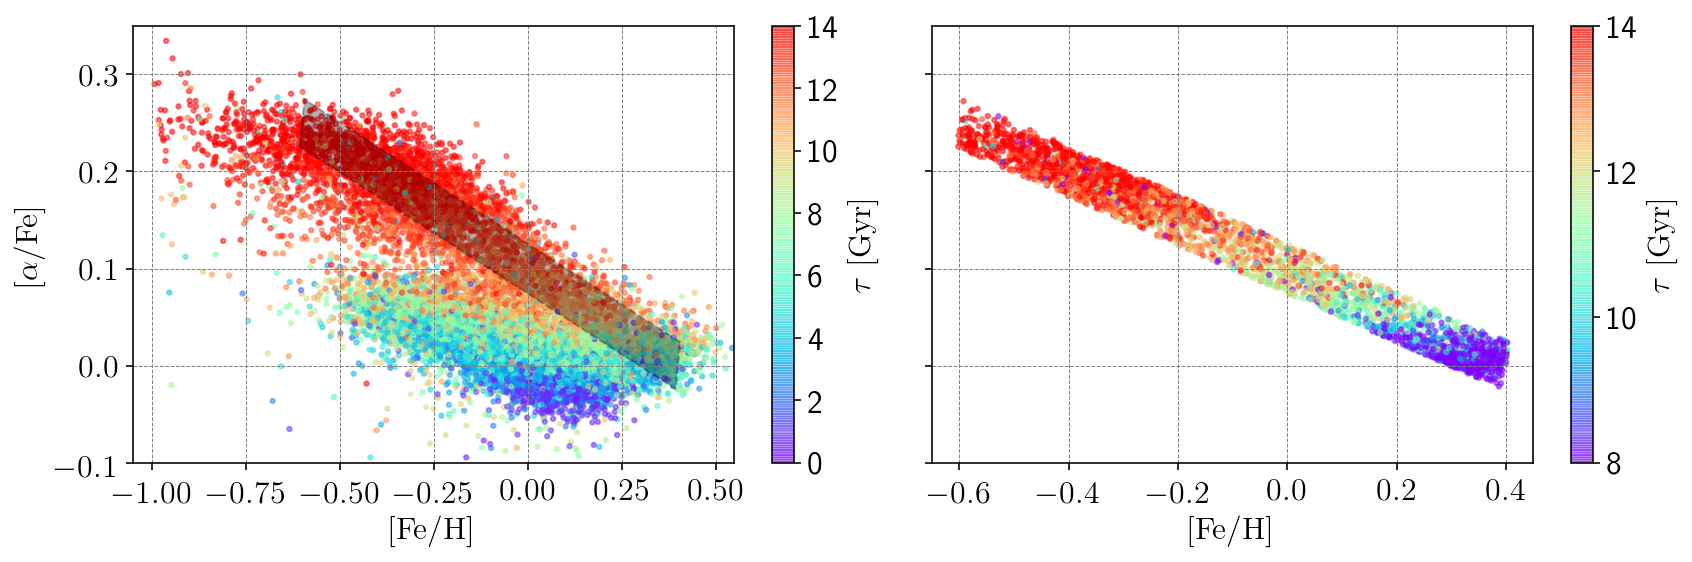

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
mpl.rcParams['text.usetex'] = True

mask = ( (data['M_H_1'] > -1.0) & (data['R_2'] >=7.0) & (data['R_2'] <= 9.0) & (abs(data['z_2c']) <= 2.0))
data_cut = data[mask]

norm_mh = mpl.colors.Normalize(vmin=-1.0, vmax=0.5)
norm_rc = mpl.colors.Normalize(vmin=6.0, vmax=10.0)
norm_alpha = mpl.colors.Normalize(vmin=-0.05, vmax=0.3)
norm_age = mpl.colors.Normalize(vmin=0, vmax=14)
norm_logAge = mpl.colors.Normalize(vmin=0.8, vmax=1.1)
norm_Jz = mpl.colors.Normalize(vmin=0, vmax=30.0)
norm_age_small =  mpl.colors.Normalize(vmin=8, vmax=14)

#polygon = Polygon([(-0.35, 0.1), (0.4, 0.05), (0.0, 0.12)])
#patch = PolygonPatch(polygon, facecolor=[1,1,0.5], color='k', edgecolor=[1,1,1], alpha=0.3) 

x5 = -0.6
y5 = 0.25

x6 = 0.4
y6 = 0.0

delta_x = math.sin(14*np.pi/180) * 0.025
delta_y = math.cos(14*np.pi/180) * 0.025

x7 = x5 - delta_x
y7 = y5 - delta_y

x8 = x5 + delta_x
y8 = y5 + delta_y

x9 = x6 - delta_x
y9 = y6 - delta_y

x10 = x6 + delta_x
y10 = y6 + delta_y


#ax.add_patch(patch_lowal)

new_polygon = Polygon([(x7, y7),(x8,y8), (x10, y10),(x9, y9), ])
new_patch = PolygonPatch(new_polygon, facecolor=[0,0,0.3], color='k', edgecolor=[1,1,1], alpha=0.3, ls='--')

mask_ridge = []

for i in range(len(mh)):
    p1 = Point(mh[i], alpha[i])
    
    mask_ridge.append(new_polygon.contains(p1))

ridge = data_cut[mask_ridge]

cm_rainbow = 'rainbow'
size = 5

xvar = 'M_H_1'
yvar = 'ALPHA_M_1'

im1 = ax1.scatter(data_cut[xvar], data_cut[yvar], c=10**data_cut['pred_logAge'], cmap=cm_rainbow, s=size, norm=norm_age, alpha=0.5,  label=r'$7 <= R <= 9 kpc; \ N=15006$')
im2 = ax2.scatter(ridge[xvar], ridge[yvar], c=10**ridge['pred_logAge'], cmap=cm_rainbow, s=size, alpha=0.5, norm=norm_age_small)
#im3 = ax3.scatter(data_cut[xvar], data_cut[yvar], c=np.sqrt(data_cut['vphi_2']), cmap=cm_rainbow, s=size, alpha=0.5, norm=norm_phi)

#fig.colorbar(im1, ax=ax1, orientation='horizontal', label='tau')
cbar1= fig.colorbar(im1, ax=ax1, orientation='vertical', ticks=[0, 2, 4, 6, 8, 10, 12, 14])
cbar2= fig.colorbar(im2, ax=ax2, orientation='vertical', ticks=[8, 10, 12, 14])

cbar1.ax.set_yticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])
cbar2.ax.set_yticklabels(['8', '10', '12', '14'])
cbar1.set_label(r'$\mathrm{\tau \ [Gyr]}$', fontsize=16)
cbar2.set_label(r'$\mathrm{\tau \ [Gyr]}$', fontsize=16)

#fig.colorbar(im3, ax=ax3, orientation='horizontal')

ax1.set_ylabel(r"$\mathrm{[\alpha/Fe]}$", fontsize=16)
ax1.set_xlabel(r'$\mathrm{[Fe/H]}$', fontsize=16)
ax2.set_xlabel(r'$\mathrm{[Fe/H]}$', fontsize=16)
#ax3.set_xlabel(r'$[Fe/H]$', fontsize=14)

#ax1.set_title(r'$colored \ by \ \tau $', fontsize=22)
#ax2.set_title(r'$colored \ by \ J_z$', fontsize=22)
#ax3.set_title(r'$colored \ by \ v_{phi}$', fontsize=22)

ax1.set_xlim(-1.05, 0.55)
ax2.set_xlim(-0.65, 0.45)

ax1.add_patch(new_patch)
#ax3.set_xlim(-1.05, 0.55)

ax1.set_ylim(-0.1, 0.35)
ax2.set_ylim(-0.1, 0.35)
#ax3.set_ylim(-0.1, 0.35)

ax1.xaxis.set_major_locator(MultipleLocator(0.25))
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
#ax3.xaxis.set_major_locator(MultipleLocator(0.2))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
#ax3.yaxis.set_major_locator(MultipleLocator(0.1))

lw=0.5
ax1.grid(which='major', axis='both', linestyle='--', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='--', linewidth=lw, color='gray')
#ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()

plt.savefig('/Users/ioanaciuca/Desktop/fellowship_plot.pdf', dpi=200)
#plt.savefig('./afe_feh_general_vphi_lowalpha.png', format='png', dpi=200)

In [ ]:
plt.hist(data_cut['vphi_2'])